In [1]:
'''
Resource to install lunar lander
https://stackoverflow.com/questions/64161280/rl-problem-on-colab-for-gym-envs-box2d-has-no-attribute-lunarlander
'''
!pip3 install box2d-py
!pip3 install gym[Box_2D]

     |████████████████████████████████| 448 kB 14.0 MB/s 


In [2]:
import gym
import numpy as np
import random
from collections import namedtuple, deque
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
import matplotlib.pyplot as plt
import os
from torch.nn.functional import one_hot, log_softmax, softmax, normalize

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Rendering OpenAi env in colab


In [4]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

     |████████████████████████████████| 951 kB 12.8 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
import gym
from gym.wrappers import Monitor
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay
import shutil 

display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment 
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""

def show_video(save_dir_name):
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    print(mp4list)
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    
    source = mp4list[0]
    print(source)
    dest = save_dir_name
    dest = shutil.move(source, dest)
    

  else: 
    print("Could not find video")
    
def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [6]:
!pwd

/content


# 3a) CartPole problem ...Rand Agent

In [4]:
CP_env = gym.make('CartPole-v0')
CP_env.reset()

### Exploring the env
print('State Space of the CP env : ',CP_env.observation_space)
print('Action Space of the CP env : ',CP_env.action_space.n)


### EXtents of the state space 
print('Low extent of CP env', CP_env.observation_space.low )
print('High extent of CP env', CP_env.observation_space.high)


State Space of the CP env :  Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
Action Space of the CP env :  2
Low extent of CP env [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
High extent of CP env [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [ ]:
# Initializing a random agent...

class RandAgent():
  def __init__(self,env):
    self.env = env
    pass
  def take_action(self):
    action = self.env.action_space.sample()
    return action

In [ ]:

CP_env = gym.make('CartPole-v0')
randAgent = RandAgent(CP_env)


print(CP_env.action_space)
CP_env.reset()
print((CP_env.state) )
done  = False
steps = 0



while not done :

  action = randAgent.take_action()
  obs, rew, done, info = CP_env.step(action)
  steps += 1
  
  print('Step {} --> action {} --> reward {} --> cart pos {:.2f} , pole angle {:.2f}'.format(steps,action, rew, obs[0], obs[2]*(180/3.14)))

print((CP_env.state) )
CP_env.close()



Discrete(2)
[-0.00425875 -0.01045615 -0.01864073 -0.00169451]
Step 1 --> action 1 --> reward 1.0 --> cart pos -0.00 , pole angle -1.07
Step 2 --> action 0 --> reward 1.0 --> cart pos -0.00 , pole angle -1.41
Step 3 --> action 0 --> reward 1.0 --> cart pos -0.00 , pole angle -1.43
Step 4 --> action 0 --> reward 1.0 --> cart pos -0.01 , pole angle -1.12
Step 5 --> action 0 --> reward 1.0 --> cart pos -0.01 , pole angle -0.48
Step 6 --> action 0 --> reward 1.0 --> cart pos -0.02 , pole angle 0.48
Step 7 --> action 0 --> reward 1.0 --> cart pos -0.04 , pole angle 1.78
Step 8 --> action 1 --> reward 1.0 --> cart pos -0.06 , pole angle 3.42
Step 9 --> action 1 --> reward 1.0 --> cart pos -0.08 , pole angle 4.73
Step 10 --> action 1 --> reward 1.0 --> cart pos -0.09 , pole angle 5.73
Step 11 --> action 0 --> reward 1.0 --> cart pos -0.10 , pole angle 6.43
Step 12 --> action 0 --> reward 1.0 --> cart pos -0.11 , pole angle 7.49
Step 13 --> action 0 --> reward 1.0 --> cart pos -0.12 , pole angl

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
rand_agent = RandAgent(CP_env)
save_dir_name = '/content'


CP_env = wrap_env(gym.make('CartPole-v0'))
CP_env.reset()

obs = CP_env.state
done  = False
steps = 0

while not done :
  action = rand_agent.take_action()
  obs, rew, done, info = CP_env.step(action)
  steps += 1

CP_env.close()
show_video(save_dir_name)


['video/openaigym.video.1.1753.video000000.mp4']


video/openaigym.video.1.1753.video000000.mp4


# PG algo
## For advantage normalization ,we used the baseline that consists of average of rewards until that instant. 4) in slide

In [7]:
### Model architecture...

class PNet(nn.Module):

  '''
  A simple neural net that acts as a func approximator to Policy : outputs logits for actions ,,
  '''
  def __init__(self,seed, state_size, action_size):
    super(PNet, self).__init__()
    self.state_size = state_size
    self.action_size = action_size

    self.seed = torch.manual_seed(seed)
    self.fc1_size = 64
    self.fc2_size = 64

    self.fc1 = nn.Linear(self.state_size,self.fc1_size )
    self.fc2 = nn.Linear(self.fc1_size,self.fc2_size )
    self.out = nn.Linear(self.fc2_size,self.action_size )

  def forward(self,s):
    s = normalize(s, dim=0)
    s = F.relu(self.fc1(s))
    s = F.relu(self.fc2(s))
    logits = self.out(s)

    action = self.get_action(logits)
    action_loP = F.log_softmax(logits)[0][action.item()] ## log of the prob of chosen action..
    return action, action_loP

  def get_action(self, net_out):
    action = Categorical(logits = net_out).sample()  ### returns the index : action from logits
    return action


class PGAgent(PNet):
  def __init__(self, env, seed,  device,
               BATCH_SIZE  = 64,
               GAMMA = 0.99,
               LR = 5e-3,
               SCORE_WINDOW_LEN = 100,### no. of episodes for plotting learning curve
               TARGET_SCORE = 180,):
    '''
    env : used environment, 
    save_dir_name : name of the dir where the results are to be saved
    Batch size: no . of episodes in each epoch
    gamma: discount factor
    lr: learning rate of the PNet
    Target score : score to save the model and stop training
    '''

    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    super(PGAgent, self).__init__(seed, state_size, action_size)


    self.BATCH_SIZE = BATCH_SIZE
    self.LR = LR
    self.GAMMA = GAMMA
    self.TARGET_SCORE = TARGET_SCORE
    self.SCORE_WINDOW_LEN = SCORE_WINDOW_LEN
    
    self.seed = random.seed(seed)
    print(self.seed)
    self.device = device
    self.env = env

    self.PNet = PNet(seed, state_size, action_size).to(self.device)
    self.optimizer = optim.Adam(self.PNet.parameters(), lr = self.LR)

    ### adding rewards for learning curve visualizing ..
    self.total_rewards = deque([], maxlen = SCORE_WINDOW_LEN)

  def train(self,save_dir_name,
            epochs = 2000, apply_reward2go = True, apply_AdvNorm = True):




    self.epochs = epochs
    self.apply_reward2go = apply_reward2go
    self.apply_AdvNorm = apply_AdvNorm

    #### Writing results in a txt file for furhter reference...
    f= open( save_dir_name + "/train_log.txt","a")
    f.write("\nHYPERPARAMETERS\n")
    comment = str(input('Enter a comment..'))
    f.write('Comment: {}\n'.format(comment) )
    f.write("\n-------------------\n")
    f.write('BATCH_SIZE: {}\n'.format(self.BATCH_SIZE))
    f.write('GAMMA: {}\n'.format(self.GAMMA))
    f.write('LR: {}\n'.format(self.LR))
    f.write('SEED: {}\n'.format(self.seed))
    f.write('SCORE_WINDOW_LEN: {}\n'.format(self.SCORE_WINDOW_LEN))
    f.write('device: {}\n'.format(self.device))
    f.write('TARGET_SCORE: {}\n'.format(self.TARGET_SCORE))
    f.write('MAX_EPOCHS:{}\n'.format(self.epochs))
    f.write('APPLY_REWARD2GO:{}\n'.format(self.apply_reward2go))
    f.write('APPLY_ADV_NORM:{}\n'.format(self.apply_AdvNorm))
    f.write("\n-------------------\n")
    f.write("TRAINING")
    f.write("\n-------------------\n")
    ##############################################################
    '''
    for each epoch --> simulate BATCH_SIZE no. of episodes --> find loss by mean(loP*advantange_estimate)
    '''
    self.epoch_list_weighted_rewards  = torch.empty(size = (0,), dtype = torch.float, device=self.device) ## list of loP*A for each episode --> for averaging later
    self.epoch_reward_list = [] ## list containing reward for each epoch
    for self.epoch_no in range(self.epochs):
      for self.epi_no in range(self.BATCH_SIZE):

        (epi_sum_weighted_loP_rew2go, epi_sum_of_rewards) = self.simulate_trajectory() ## Simulate an episode 
        self.total_rewards.append(epi_sum_of_rewards)
        self.epoch_list_weighted_rewards = torch.cat( (self.epoch_list_weighted_rewards,epi_sum_weighted_loP_rew2go ), dim=0)
        
      self.epoch_loss = (-1* torch.mean(self.epoch_list_weighted_rewards)).to(self.device)
      self.optimizer.zero_grad()
      self.epoch_loss.backward()
      self.optimizer.step()
    

      epoch_avg_reward = np.mean(self.total_rewards)
      print('\rEpoch {}\tAverage Reward {:.3f}'.format(self.epoch_no, epoch_avg_reward )) 
      f= open( save_dir_name + "/train_log.txt","a")
      f.write('\rEpoch {}\tAverage Reward {:.3f}'.format(self.epoch_no, epoch_avg_reward ))
      f.close()

      self.epoch_reward_list.append(epoch_avg_reward)  
      self.epoch_list_weighted_rewards  = torch.empty(size = (0,), dtype = torch.float, device=self.device) ## Need to re-initialise weighted rewards for an epoch ,,

      if(epoch_avg_reward >= self.TARGET_SCORE):
        self.TARGET_SCORE = epoch_avg_reward
        torch.save(self.PNet.state_dict(),save_dir_name + '/best.pth')
        print("Model saved !!!")
        
        


    torch.save(self.PNet.state_dict(),save_dir_name + '/PNet_last.pth')
    print("Saved in ", save_dir_name + '/last.pth')
    ### Plotting and saving learning curve
    plt.plot(np.arange(len(self.epoch_reward_list)),self.epoch_reward_list)
    plt.xlabel('Epochs')
    plt.ylabel('mean-{} episode reward'.format(self.SCORE_WINDOW_LEN))
    plt.title('PG Agent Training ')
    plt.savefig(save_dir_name + '/train_plot.png')
    plt.show()

    ### Saving epoch scores
    with open(save_dir_name + '/avg_score.npy', 'wb') as f:
      np.save(f, np.array(self.epoch_reward_list) )
    

    

  def simulate_trajectory(self):
    '''
    function:
    1. Simulates an end to end trajectory
    2. Saves rewards for each transition
    3. finds avg_rewards: avg_reward[i] := avg of all rewards until that time step --> for base line
    4. When done :
    ----> finds the discoutned rewards at each step 
    -----> subtracts average_rewards from discoutned rewards : baseline --> state specific average
    -----> Also finds the sum of rewards : total reward earned during the episode (without discounting)
    -----> return weighed sum of log prob and rew 2 go
    ---------------------------------------
    Returns : 
    1. epi_weighted_log_prob_rew2go--> epi_weighted_loP_rew2go
    2. epi_reward_sum
    '''

    ### reset the state to start with
    state = self.env.reset()

    ### Init storing elements 
    epi_loP  = torch.empty(size = (0,),  device=self.device) ## loP of choosen action
    epi_rewards = np.empty(shape = (0,), dtype = np.float) ## rewards obtained at t instant
    epi_rewards_running_mean = np.empty(shape = (0,), dtype = np.float) ## running avg of [0:t] rewards acts as baseline
    
    done = False
    while not done :

      action,action_loP =  self.PNet.forward(torch.from_numpy(state).float().unsqueeze(0).to(self.device) ) ## for a given transition --> find the action chosen given state and its loP

      ### Choosing action and finding reward
      state, rew, done, _= self.env.step(action.item())
      epi_rewards = np.concatenate((epi_rewards, np.array([rew])), axis = 0)
      epi_rewards_running_mean = np.concatenate((epi_rewards_running_mean, np.array([np.mean(epi_rewards)])), axis=0)
      epi_loP = torch.cat((epi_loP,action_loP.unsqueeze(0)),dim=0)
    
    ### if episode is done .. 

    # Apply reward to go strategy ....
    epi_discount_return = PGAgent.apply_discount_factor(epi_rewards, self.GAMMA, self.apply_reward2go)

    # Apply advantage normalisation

    if(self.apply_AdvNorm):
      ### base line subtracted : here base line is a state specific baseline
      epi_advantage_estimate = epi_discount_return  - epi_rewards_running_mean
    else:
      epi_advantage_estimate = epi_discount_return

    ## finding the rewards accumulated in the episode for learning curve visual
    epi_sum_of_rewards = np.sum(epi_rewards)
    
    epi_weighted_loP_rew2go = epi_loP * torch.tensor(epi_advantage_estimate).float().to(self.device)

    epi_sum_weighted_loP_rew2go = torch.sum(epi_weighted_loP_rew2go).unsqueeze(dim=0)
    return epi_sum_weighted_loP_rew2go, epi_sum_of_rewards

  def act(self,state):
    self.PNet.eval()
    with torch.no_grad():
      action,_ =  self.PNet.forward(torch.from_numpy(state).float().unsqueeze(0).to(self.device) ) ## for a given transition --> find the action chosen given state and its loP
    return action.item()



  @staticmethod
  def apply_discount_factor(epi_rewards : np.array, gamma : float, apply_reward2go:bool)-> np.array :
    '''
    given a np array of rewards, apply discounting to each instant 

    '''

    epi_rewards_discount = np.zeros(epi_rewards.shape)
    if(apply_reward2go):
      '''
      Applying reward 2 go
      implementing rewards 2 go
      epi_rewards[t] :  reward at t instant
      epi_rewards_discount[t] : discounted return from t:end  --> sum(gamma^t-t'*reward) 
      '''
      for t in range(epi_rewards.shape[0]):
        gammas = gamma*np.ones(shape = epi_rewards[t:].shape[0])
        gammas_discount = np.power(gammas, np.arange(epi_rewards[t:].shape[0]))

        epi_rewards_discount[t] =  np.sum(epi_rewards[t:] * gammas_discount)

    else:
      '''
      Applying temporal structure
      '''
      gammas = gamma*np.ones(shape=epi_rewards.shape[0])
      gammas_discount = np.power(gammas, np.arange(epi_rewards.shape[0]))
      epi_discounted_reward = np.sum(gammas_discount* epi_rewards)
      epi_rewards_discount = epi_discounted_reward*np.ones(shape=epi_rewards.shape[0])

    return epi_rewards_discount

  @staticmethod
  def find_model_dir_title(dir_path, continue_training):
    '''
    Given a dir where all exp are stored .. finds the last dir and creates a name for the new dir
    If we want to continur training it finds the latest directory and intialises the model with last tranined models
    '''
    print('I got ',continue_training)
    dir_len = sum(os.path.isdir(dir_path +'/'+ i) for i in  os.listdir(dir_path))

    if(continue_training==1):
      dir_len = dir_len -1
    return dir_path + '/exp'+str(dir_len)


#3a)  CartPole problem ...Rand Agent

In [ ]:
CP_env = gym.make('CartPole-v0')
CP_env.reset()

### Exploring the env
print('State Space of the CP env : ',CP_env.observation_space)
print('Action Space of the CP env : ',CP_env.action_space.n)

### EXtents of the state space 
print('Low extent of CP env', CP_env.observation_space.low )
print('High extent of CP env', CP_env.observation_space.high)


State Space of the CP env :  Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
Action Space of the CP env :  2
Low extent of CP env [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
High extent of CP env [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [ ]:
# Initializing a random agent...

class RandAgent():
  def __init__(self,env):
    self.env = env
    pass
  def take_action(self):
    action = self.env.action_space.sample()
    return action

In [ ]:

CP_env = gym.make('CartPole-v0')
randAgent = RandAgent(CP_env)


print(CP_env.action_space)
CP_env.reset()
print((CP_env.state) )
done  = False
steps = 0



while not done :

  action = randAgent.take_action()
  obs, rew, done, info = CP_env.step(action)
  steps += 1
  
  print('Step {} --> action {} --> reward {} --> cart pos {:.2f} , pole angle {:.2f}'.format(steps,action, rew, obs[0], obs[2]*(180/3.14)))

print((CP_env.state) )
CP_env.close()



Discrete(2)
[-0.00425875 -0.01045615 -0.01864073 -0.00169451]
Step 1 --> action 1 --> reward 1.0 --> cart pos -0.00 , pole angle -1.07
Step 2 --> action 0 --> reward 1.0 --> cart pos -0.00 , pole angle -1.41
Step 3 --> action 0 --> reward 1.0 --> cart pos -0.00 , pole angle -1.43
Step 4 --> action 0 --> reward 1.0 --> cart pos -0.01 , pole angle -1.12
Step 5 --> action 0 --> reward 1.0 --> cart pos -0.01 , pole angle -0.48
Step 6 --> action 0 --> reward 1.0 --> cart pos -0.02 , pole angle 0.48
Step 7 --> action 0 --> reward 1.0 --> cart pos -0.04 , pole angle 1.78
Step 8 --> action 1 --> reward 1.0 --> cart pos -0.06 , pole angle 3.42
Step 9 --> action 1 --> reward 1.0 --> cart pos -0.08 , pole angle 4.73
Step 10 --> action 1 --> reward 1.0 --> cart pos -0.09 , pole angle 5.73
Step 11 --> action 0 --> reward 1.0 --> cart pos -0.10 , pole angle 6.43
Step 12 --> action 0 --> reward 1.0 --> cart pos -0.11 , pole angle 7.49
Step 13 --> action 0 --> reward 1.0 --> cart pos -0.12 , pole angl

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
rand_agent = RandAgent(CP_env)
save_dir_name = '/content'


CP_env = wrap_env(gym.make('CartPole-v0'))
CP_env.reset()

obs = CP_env.state
done  = False
steps = 0

while not done :
  action = rand_agent.take_action()
  obs, rew, done, info = CP_env.step(action)
  steps += 1

CP_env.close()
show_video(save_dir_name)


['video/openaigym.video.1.1753.video000000.mp4']


video/openaigym.video.1.1753.video000000.mp4


# CartPole-V0 - PG solution

None
continue_training..?0
I got  0
Created	 /content/drive/MyDrive/RL_implementations/Cart_Pole-V0/PG/exp11
Enter a comment..both false


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	Average Reward 21.688
Epoch 1	Average Reward 20.810
Epoch 2	Average Reward 22.580
Epoch 3	Average Reward 27.180
Epoch 4	Average Reward 31.800
Epoch 5	Average Reward 38.610
Epoch 6	Average Reward 50.000
Epoch 7	Average Reward 52.280
Epoch 8	Average Reward 63.150
Epoch 9	Average Reward 71.970
Epoch 10	Average Reward 82.320
Epoch 11	Average Reward 90.350
Epoch 12	Average Reward 111.890
Epoch 13	Average Reward 143.640
Epoch 14	Average Reward 156.270
Epoch 15	Average Reward 160.460
Epoch 16	Average Reward 158.300
Epoch 17	Average Reward 162.680
Epoch 18	Average Reward 166.420
Epoch 19	Average Reward 166.710
Epoch 20	Average Reward 163.990
Epoch 21	Average Reward 148.060
Epoch 22	Average Reward 147.700
Epoch 23	Average Reward 132.030
Epoch 24	Average Reward 122.360
Saved in  /content/drive/MyDrive/RL_implementations/Cart_Pole-V0/PG/exp11/last.pth


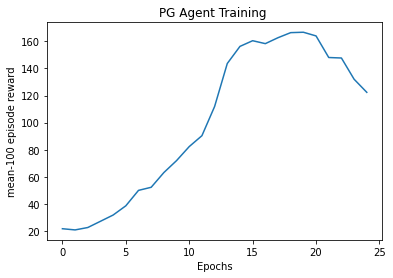

In [10]:
### Setup

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

CP_env = gym.make('CartPole-v0')
my_seed = 0



agent = PGAgent(CP_env, seed = my_seed, device = device,
                BATCH_SIZE  = 64,
               GAMMA = 0.99,
               LR = 5e-3,
               SCORE_WINDOW_LEN = 100,### no. of episodes for plotting learning curve
               TARGET_SCORE = 190,)
continue_training = int(input('continue_training..?'))
save_dir_name = PGAgent.find_model_dir_title(dir_path = '/content/drive/MyDrive/RL_implementations/Cart_Pole-V0/PG', continue_training = continue_training)


if(continue_training==0):
  print('Created\t',save_dir_name )
  os.mkdir(save_dir_name)

agent.train(save_dir_name,
            epochs = 25, apply_reward2go = False, apply_AdvNorm = False)


# Inference and rendering the trained agent

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
CP_env = wrap_env(gym.make('CartPole-v0'))
save_dir_name = '/content/drive/MyDrive/RL_implementations/Cart_Pole-V0/PG/exp5'
PATH = save_dir_name + '/best.pth'
trained_agent = PGAgent(CP_env, seed = 101, device = device)
trained_agent.PNet.load_state_dict(torch.load(PATH))

CP_env.reset()
obs = CP_env.state
done = False

while not done:
  action = trained_agent.act(obs)
  obs,rew,done,_ = CP_env.step(action)

CP_env.close()
show_video(save_dir_name)

None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


['video/openaigym.video.0.62.video000000.mp4']


video/openaigym.video.0.62.video000000.mp4


# Lunar Lander - Rand Agent

In [ ]:

LL_env = gym.make('LunarLander-v2')
LL_env.reset()

### Exploring the env
print('State Space of the LL env : ',LL_env.observation_space)
print('Action Space of the LL env : ',LL_env.action_space.n)


### EXtents of the state space 
print('Low extent of LL env', LL_env.observation_space.low )
print('High extent of LL env', LL_env.observation_space.high)
"""
s (list): The state. Attributes:
        s[0] is the horizontal coordinate
        s[1] is the vertical coordinate
        s[2] is the horizontal speed
        s[3] is the vertical speed
        s[4] is the angle
        s[5] is the angular speed
        s[6] 1 if first leg has contact, else 0
        s[7] 1 if second leg has contact, else 0
returns:
a: The heuristic to be fed into the step function defined above to determine the next step and reward.
    """

State Space of the LL env :  Box(-inf, inf, (8,), float32)
Action Space of the LL env :  4
Low extent of LL env [-inf -inf -inf -inf -inf -inf -inf -inf]
High extent of LL env [inf inf inf inf inf inf inf inf]


In [ ]:
print(LL_env.reset())

[ 0.00711861  1.4057366   0.7210181  -0.23039956 -0.00824188 -0.16332152
  0.          0.        ]


In [ ]:
# Initializing a random agent...
class RandAgent():
  def __init__(self,env):
    self.env = env
    pass
  def take_action(self):
    action = self.env.action_space.sample()
    return action
  

LL_env = wrap_env(gym.make('LunarLander-v2'))
LL_env.reset()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
rand_agent = RandAgent(LL_env)
save_dir_name = '/content'


obs = LL_env.reset()
done  = False
steps = 0

while not done :
  action = rand_agent.take_action()
  obs, rew, done, info = LL_env.step(action)
  steps += 1
  print('Step {} --> action {} --> reward {} --> LLander horiz_pos {:.2f} , verti_pos {:.2f}'.format(steps,action, rew, obs[0], obs[1]))


LL_env.close()
show_video(save_dir_name)


# Training Lunar Lander Agent

In [ ]:
### Setup

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
LL_env = (gym.make('LunarLander-v2'))
my_seed = 0



agent = PGAgent(LL_env, seed = my_seed, device = device,
                BATCH_SIZE  = 64,
               GAMMA = 0.99,
               LR = 5e-3,
               SCORE_WINDOW_LEN = 100,### no. of episodes for plotting learning curve
               TARGET_SCORE = 0,)
continue_training = int(input('continue_training..?'))
save_dir_name = PGAgent.find_model_dir_title(dir_path = '/content/drive/MyDrive/RL_implementations/LunarLander-V2/PG', continue_training = continue_training)
if(continue_training):
  PATH = save_dir_name + '/best.pth'
  agent.PNet.load_state_dict(torch.load(PATH))

if(continue_training==0):
  print('Created\t',save_dir_name )
  os.mkdir(save_dir_name)

agent.train(save_dir_name,
            epochs = 300, apply_reward2go = True, apply_AdvNorm = True)


None
I got  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	Average Reward 3.082
Model saved !!!
Epoch 1	Average Reward -16.193
Epoch 2	Average Reward -12.981
Epoch 3	Average Reward -14.336
Epoch 4	Average Reward -35.095
Epoch 5	Average Reward -10.404
Epoch 6	Average Reward -9.488
Epoch 7	Average Reward -12.711
Epoch 8	Average Reward -20.775
Epoch 9	Average Reward -12.774
Epoch 10	Average Reward -29.462
Epoch 11	Average Reward -37.427
Epoch 12	Average Reward -40.693
Epoch 13	Average Reward -50.404
Epoch 14	Average Reward -41.744
Epoch 15	Average Reward -31.012
Epoch 16	Average Reward -14.861
Epoch 17	Average Reward -0.932
Epoch 18	Average Reward 4.184
Model saved !!!
Epoch 19	Average Reward 6.935
Model saved !!!
Epoch 20	Average Reward 0.266
Epoch 21	Average Reward -15.954
Epoch 22	Average Reward -18.283
Epoch 23	Average Reward -18.806
Epoch 24	Average Reward -14.828
Epoch 25	Average Reward -8.377
Epoch 26	Average Reward -12.660
Epoch 27	Average Reward -4.730
Epoch 28	Average Reward 14.771
Model saved !!!
Epoch 29	Average Reward 1.816
E

# Learning curve for trained Lunar lander agent ..

HYPERPARAMETERS


-------------------

BATCH_SIZE: 64

GAMMA: 0.99

LR: 0.005

SEED: None

SCORE_WINDOW_LEN: 100

device: cuda:0

TARGET_SCORE: 0

MAX_EPOCHS:100

APPLY_REWARD2GO:True

APPLY_ADV_NORM:True



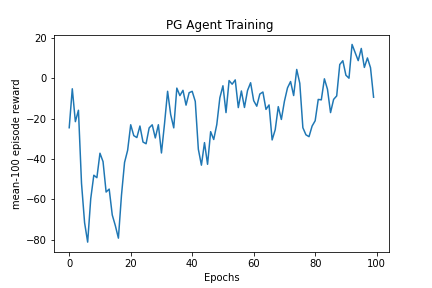


In [12]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
LL_env = wrap_env(gym.make('LunarLander-v2'))
save_dir_name = '/content/drive/MyDrive/RL_implementations/LunarLander-V2/PG/exp0'
PATH = save_dir_name + '/best.pth'
trained_agent = PGAgent(LL_env, seed = 10, device = device)
trained_agent.PNet.load_state_dict(torch.load(PATH))

obs = LL_env.reset()
done = False

while not done:
  action = trained_agent.act(obs)
  obs,rew,done,_ = LL_env.step(action)

print(rew)
LL_env.close()
show_video(save_dir_name)

None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


0.35656170114794894
['video/openaigym.video.1.72.video000000.mp4']


video/openaigym.video.1.72.video000000.mp4


# 3b) With & without reward2go and advantage normalisation functionality : 
>> Analysed only for cart pole environment due to constraints ,

The following parameters remain constant

HYPERPARAMETERS  

Comment: training for 25 epochs

-------------------
BATCH_SIZE: 64

GAMMA: 0.99

LR: 0.005

SEED: 0

SCORE_WINDOW_LEN: 100

device: cuda:0

TARGET_SCORE: 190

MAX_EPOCHS:25

APPLY_REWARD2GO:True

APPLY_ADV_NORM:True

# Reward2go : True,
# advantage normalisation : True

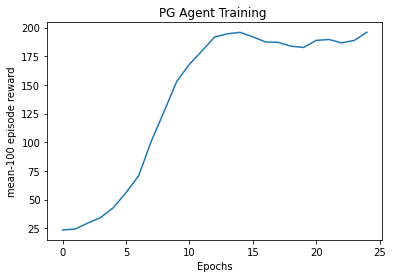

# Reward2go : False
# advantage normalisation: True

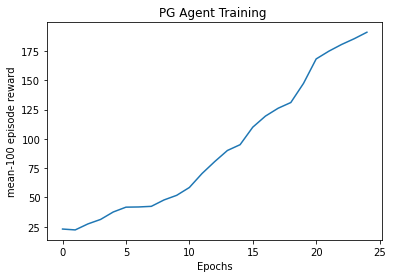

# Reward2go : True
# advantage normalisation : False

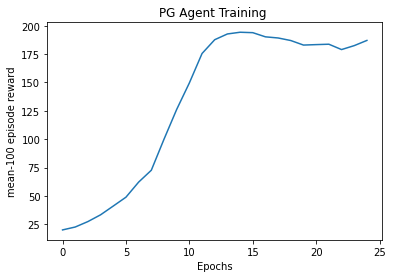

# Reward2go : False
# advantage normalisation : False


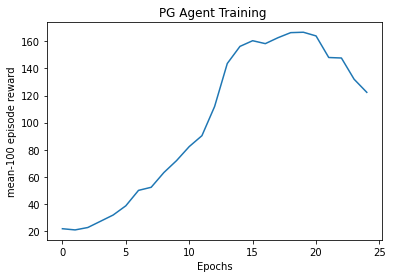

# Observation:
We can see that reward to go functionality plays a crucial role comparitive to the advantage normalisation, If both are turned off --> takes more epochs to train.

# 3c ) Varying batch sizes for Cart - Pole V0 model

Constant params ...

HYPERPARAMETERS

Comment: training for 25 epochs

-------------------

BATCH_SIZE: 64

GAMMA: 0.99

LR: 0.005

SEED: None

SCORE_WINDOW_LEN: 100

device: cpu

TARGET_SCORE: 190

MAX_EPOCHS:25

APPLY_REWARD2GO:True

APPLY_ADV_NORM:True

# >> For Batch size 64

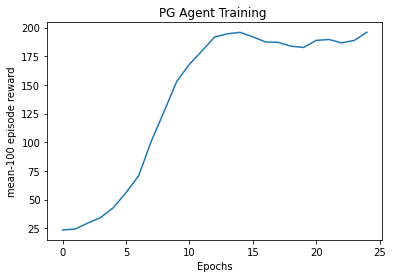

#>> For batch size 4

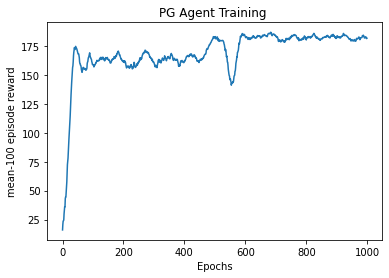

# >> For batch size of 256

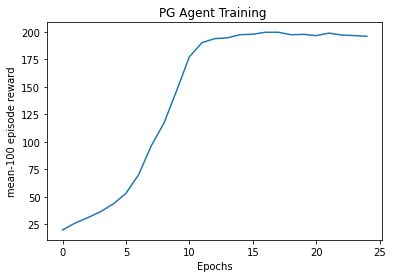

### Observation : We can see that with smaller batch sizes the training takes longer epochs .. --> which is evident since more epochs with small batch sizes will be equivalent to fewer epochs with larger batch sizes.

# 3d attached as pdf in the same folder